**Persiapan Data**

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

import os

path = "/content/gdrive/MyDrive/praktikum_ml/praktikum12"
try:
    print(os.listdir(path))
except FileNotFoundError:
    print(f"Directory not found: {path}")

df = pd.read_csv(f'{path}/data/data.csv')

print(df.head())
print(df.info())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['data', 'notebooks']
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414            

**Analisis Varian**

PCA diterapkan untuk menemukan komponen utama. Langkah pentingnya adalah menentukan berapa banyak komponen yang diperlukan untuk mempertahankan sebagian besar informasi dari data asli.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

df_pca = df.drop(columns=['id', 'Unnamed: 32'])

X = df_pca.drop(columns=['diagnosis'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

explained_variance_df = pd.DataFrame({
    'Komponen Utama': range(1, len(explained_variance_ratio_cumsum) + 1),
    'Rasio Varian Dijelaskan': pca.explained_variance_ratio_,
    'Varian Dijelaskan Kumulatif': explained_variance_ratio_cumsum
})

print("Ringkasan Varian Dijelaskan (10 Komponen Teratas):\n", explained_variance_df.head(10).to_markdown(index=False, numalign="left", stralign="left"))

Ringkasan Varian Dijelaskan (10 Komponen Teratas):
 | Komponen Utama   | Rasio Varian Dijelaskan   | Varian Dijelaskan Kumulatif   |
|:-----------------|:--------------------------|:------------------------------|
| 1                | 0.44272                   | 0.44272                       |
| 2                | 0.189712                  | 0.632432                      |
| 3                | 0.0939316                 | 0.726364                      |
| 4                | 0.0660213                 | 0.792385                      |
| 5                | 0.0549577                 | 0.847343                      |
| 6                | 0.0402452                 | 0.887588                      |
| 7                | 0.0225073                 | 0.910095                      |
| 8                | 0.0158872                 | 0.925983                      |
| 9                | 0.0138965                 | 0.939879                      |
| 10               | 0.0116898                 | 0.951569

**Visualisasi Varian yang Dijelaskan (Scree Plot)**

Plot di atas menunjukkan visualisasi perbandingan rasio varian yang dijelaskan oleh setiap komponen dan kumulatifnya. Garis merah vertikal menunjukkan titik di mana varian kumulatif mencapai $95\%$ (pada komponen ke-$10$).


Jumlah komponen yang diperlukan untuk menjelaskan 95% dari varian: 10


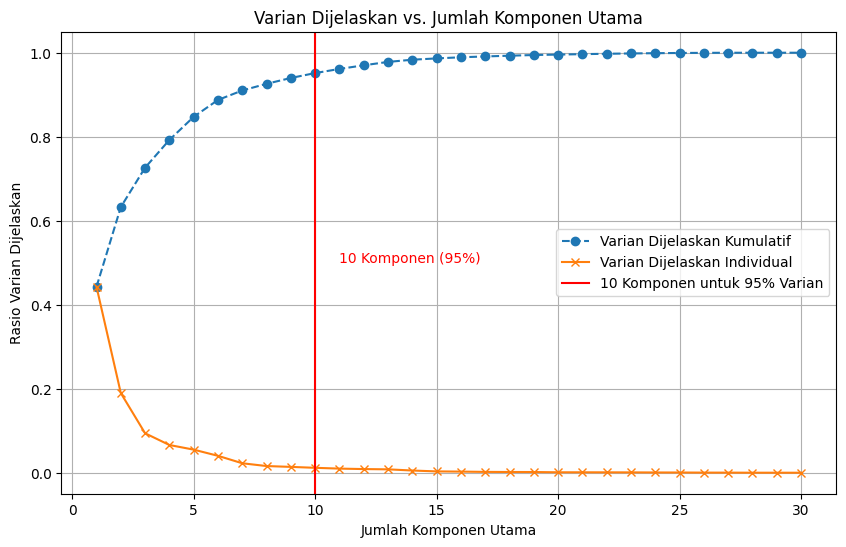

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, marker='o', linestyle='--', label='Varian Dijelaskan Kumulatif')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='x', linestyle='-', label='Varian Dijelaskan Individual')
label_95_percent = f'{n_components_95} Komponen untuk 95% Varian'
plt.axvline(x=n_components_95, color='r', linestyle='-', label=label_95_percent)
plt.text(n_components_95 + 1, 0.5, f'{n_components_95} Komponen (95%)', color='r', ha='left')
plt.title('Varian Dijelaskan vs. Jumlah Komponen Utama')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Rasio Varian Dijelaskan')
plt.grid(True)
plt.legend()
plt.savefig('explained_variance_plot_id.png')
print(f"\nJumlah komponen yang diperlukan untuk menjelaskan 95% dari varian: {n_components_95}")

**Transformasi Data**

Data fitur asli (30 dimensi) telah ditransformasikan ke dalam ruang $10$ dimensi baru yang dibentuk oleh 10 Komponen Utama (PC1 hingga PC10) yang menjelaskan 95% varian.

In [ ]:
n_components_95 = 10
pca_final = PCA(n_components=n_components_95)
X_pca = pca_final.fit_transform(X_scaled)

component_names = [f'PC{i}' for i in range(1, n_components_95 + 1)]
df_pca_final = pd.DataFrame(data=X_pca, columns=component_names)

df_pca_final['diagnosis'] = y.values

print("Data yang telah di transormasi (5 baris teratas):\n", df_pca_final.head().to_markdown(index=False, numalign="left", stralign="left"))

df_pca_final.to_csv('data_pca_transformed.csv', index=False)

Data yang telah di transormasi (5 baris teratas):
 | PC1     | PC2      | PC3       | PC4       | PC5       | PC6       | PC7       | PC8       | PC9       | PC10      | diagnosis   |
|:--------|:---------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|:----------|:------------|
| 9.19284 | 1.94858  | -1.12317  | -3.63373  | 1.19511   | 1.41142   | 2.15937   | -0.398407 | -0.157118 | -0.877402 | M           |
| 2.3878  | -3.76817 | -0.529293 | -1.11826  | -0.621775 | 0.0286564 | 0.0133581 | 0.240988  | -0.711905 | 1.10699   | M           |
| 5.7339  | -1.07517 | -0.551748 | -0.912083 | 0.177086  | 0.541452  | -0.668166 | 0.0973737 | 0.0240656 | 0.454275  | M           |
| 7.12295 | 10.2756  | -3.23279  | -0.152547 | 2.96088   | 3.05342   | 1.42991   | 1.05957   | -1.40544  | -1.11698  | M           |
| 3.9353  | -1.94807 | 1.38977   | -2.94064  | -0.546747 | -1.22649  | -0.936213 | 0.636376  | -0.263805 | 0.377704  | M           |
